<h3 text align='center';> ISAT 341: Data Science and Machine Learning </h3>
<h3 text align='center';> (Kelsey Robertson)
    <br>
    
<h3 text align='center';> Lab 7: Artificial Neurons and Machine Learning </h3>
  
   
<h3 style="text-align: center;"><em>Implementing a Perceptron Learning Algorithm in Python</em></h3>

<u>Objectives</u>
 - Reuse and modify code from Activity 10 (Pre-Lab 7).
 - Reuse code from other lab(s)
 - Understand the McCulloch and Pitts (MCP) simplified model of a neuron
 - Mathematically Implement Frank Rosenblatt’s perceptron learning rule based on the MCP neuron model (use some Linear Algebra)
- Use the Python Programming Language to Implement Frank Rosenblatt’s perceptron learning rule based on the MCP neuron model.
- Use NumPy matrix products and other Numpy features (arrays and methods)
- Train the MCP model for binary classification on subset of Iris flower dataset


### Implementing a Perceptron Learning Algorithm in Python

In [100]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.
    
    Parameters
    ------------
    eta : float
        Learning rate
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.
    
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    
    """
   # constructor - initializes an object into two variables
    def __init__(self, eta = 0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
   # fit method - the weights are initally zero, but then have been modified to the default values    
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object
        
        """
        self.w_ = np.zeros(1 + X.shape[1])
        
        #modifying weights
        self.w_[0], self.w_[1], self.w_[2] = 1,-2,3
        
        #error list
        self.errors_ = []
        
        #represents training the epoch...within each epoch, training is implemented and each target variable is aligned 
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                #the update is calculated to the weights based on the prediciton errors and then it gets multiplied by the learning rate
                update = self.eta * (target - self.predict(xi))
                #weight vector is updated for algorithm
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0) # misclassifications are counted
            self.errors_.append(errors) # the number of errors is added to error list
        return self
    
    # net input is calculated by taking the X and w_ and adding the specified weights
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    # predicts the class for X, uses the calculated net input, and decides what to return based on if net input is greate than or equal to 0
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


### Import Iris Dataset from UCL Machine Learning Reposition into a Pandas dataframe

In [101]:
# Load the iris flower dataset from the UCI Machine Learning Repository into a Pandas Dataframe
import pandas as pd 

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases/iris/iris.data', header= None)

### Subset of the data encoded with binary vales 1 and -1 as the class labels

In [102]:
# iloc indexer syntax : data_frame_name.iloc[row selection,column selection]
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 

# Select setosa and versicolor
y = df.iloc[0:100,4].values

In [103]:
y = np.where(y == 'Iris-setosa', -1, 1)

In [104]:
# Extract sepal length and petal length
X = df.iloc [0:100, [0,2]].values

### Plot the decision boundary

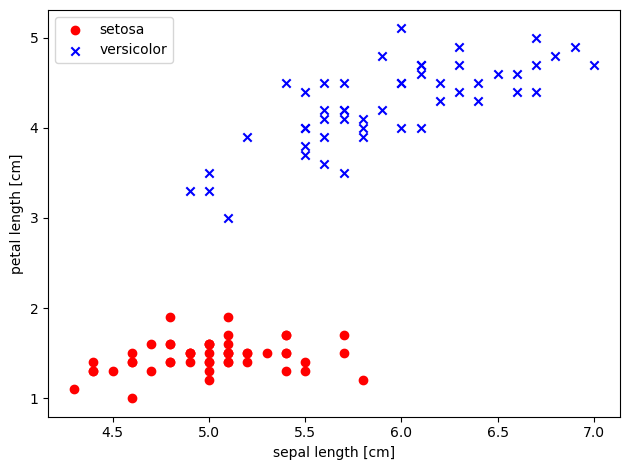

In [105]:
# Plot data 
plt.scatter(X[:50,0], X[:50,1],
           color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100,0], X[50:100,1],
           color = 'blue', marker = 'x', label = 'versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

### Training the Perceptron Model: Instantiate the class with the default values and call the fit method


In [106]:
ppn = Perceptron(eta=0.2, n_iter=10)

In [107]:
ppn.fit(X,y)

### Plot the Misclassifications(errors) after each epoch 


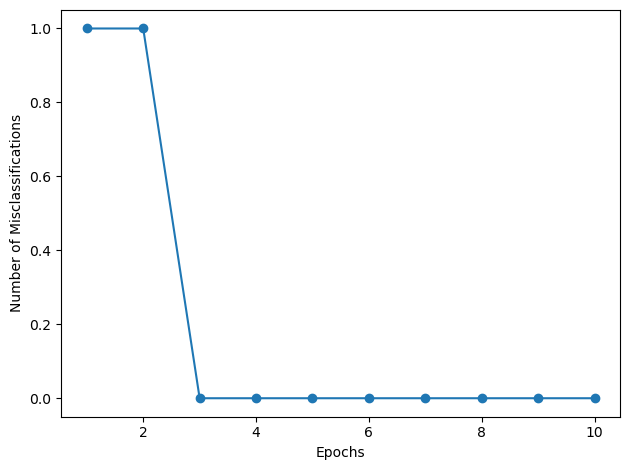

In [108]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')

plt.tight_layout()
plt.savefig('Perceptron_1.png', dpi=300)
plt.show()

<u>Comment On Modifying Weights:</u>
Initalizing the weights to be other than zero allows for the rates of the convergence (number of epochs required) of the perceptron algorithm to become either slower or faster depending on how far the initial weights are from the optimal weights. Using random here allows for different weights configerations, which can cause the convergences to become faster or slower. 

<table>
    <tr> <td>Run #</td> <td>η</td> <td>Epochs to convergence</td> <td>w0
</td> <td>w1</td> <td>w2</td> </tr><tr> <td>1</td> <td>0.05</td> <td>6</td><td>0</td> <td>0</td> <td> <center/>0 </td> <td><center/> </td> </tr>
       <tr> <td>2</td> <td>0.1</td> <td>4</td> <td>.5</td> <td> <center/>.5 </td> <td><center/>.5 </td> </tr>
       <tr> <td>3</td> <td>0.05</td> <td>1</td> <td>2</td> <td> <center/> -2</td> <td><center/>3 </td> </tr>
    <tr> <td>4</td> <td>0.05</td> <td>5</td> <td>-4</td> <td> <center/>4 </td> <td><center/>1 </td> </tr>
    <tr> <td>5</td> <td>0.2</td> <td>3</td> <td>1</td> <td> <center/>-2 </td> <td><center/>3 </td> </tr>
</table>

### Questions

self.w_[1:] += update * xi

This line of code is updating the weights using the perceptrons learning rate and adjusting each weight becomes adjusted based on the error that is between the predicted outcomes and the target/feature value.

errors += int(update !=0.0)

This line of code is keeping track of the misclassifications in each epoch and helps to look after the convergences of the algorithm. 